In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'   # 한글 폰트 사용
plt.rcParams['font.size'] = 20   # Matplotlib 폰트 사이즈 변경
plt.rcParams['axes.unicode_minus'] = False  # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상해결

## 데이터 확인 및 정제

In [2]:
# 데이터 확인
retail = pd.read_csv('retail_sales_dataset.csv', encoding = 'utf-8')
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1000 non-null   int64  
 1   Date              1000 non-null   object 
 2   Customer ID       1000 non-null   object 
 3   Gender            1000 non-null   object 
 4   Age               1000 non-null   int64  
 5   Product Category  1000 non-null   object 
 6   Quantity          1000 non-null   int64  
 7   Price per Unit    1000 non-null   float64
 8   Total Amount      1000 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [3]:
retail.head()  # DataFrame의 전체적인 구조파악

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,5.0,15.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,50.0,100.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,3.0,3.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,50.0,50.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,5.0,10.0


In [4]:
# 각 열에 대해 상위 10개의 고유 값과 그 빈도수를 출력하여 데이터의 특성을 파악
for i in retail:
    print('-------------')
    print(retail[i].value_counts().head(10))
    print('-------------')

-------------
Transaction ID
1      1
672    1
659    1
660    1
661    1
662    1
663    1
664    1
665    1
666    1
Name: count, dtype: int64
-------------
-------------
Date
2023-05-16    11
2023-07-14    10
2023-05-23     9
2023-08-05     8
2023-02-05     8
2023-10-11     7
2023-04-23     7
2023-11-02     6
2023-12-23     6
2023-04-19     6
Name: count, dtype: int64
-------------
-------------
Customer ID
CUST001    1
CUST672    1
CUST659    1
CUST660    1
CUST661    1
CUST662    1
CUST663    1
CUST664    1
CUST665    1
CUST666    1
Name: count, dtype: int64
-------------
-------------
Gender
Female    510
Male      490
Name: count, dtype: int64
-------------
-------------
Age
43    31
64    31
57    30
51    30
34    28
54    28
22    27
62    27
42    26
47    26
Name: count, dtype: int64
-------------
-------------
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64
-------------
-------------
Quantity
4    263
1    253
2    243
3

In [5]:
retail.columns  # columns를 살펴보고 각 columns의 의미를 파악


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

**Transaction Id: TXID, 거래번호** <br>
**Date: 구매날짜** <br>
**CustomerID: 고객 ID** <br>
**Gender: 구매자 성별** <br>
**Age: 구매자 나이** <br>
**Product Category: 상품 품목** <br>
**Quantity: 상품 주문 수량** <br>
**Price per Unit: 단위 당 가격** <br>
**Total Amount: 총액** <br>


In [6]:
# Price per Unit, Total Amount열을 숫자로 변환
retail['Price per Unit'] = pd.to_numeric(retail['Price per Unit'], errors='coerce')
retail['Total Amount'] = pd.to_numeric(retail['Total Amount'], errors='coerce')

# 문자열로 로딩하는 것보다 date/datetime 타입으로 로딩하는 것이 분석에 용이
retail['Date']=pd.to_datetime(retail['Date'])
retail.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,5.0,15.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,50.0,100.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,3.0,3.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,50.0,50.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,5.0,10.0


In [7]:
retail.info()   # 각 column의 정보 살펴보기
                # null값이 존재하는 경우 해당 row를 제거하고 진행

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   float64       
 8   Total Amount      1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 70.4+ KB


In [8]:
retail.describe() 

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,17.989000,45.600000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,2.500000,2.500000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,3.000000,6.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,5.000000,13.500000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,30.000000,90.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,50.000000,200.000000
std,288.819436,NaN,13.68143,1.132734,18.968136,55.999763


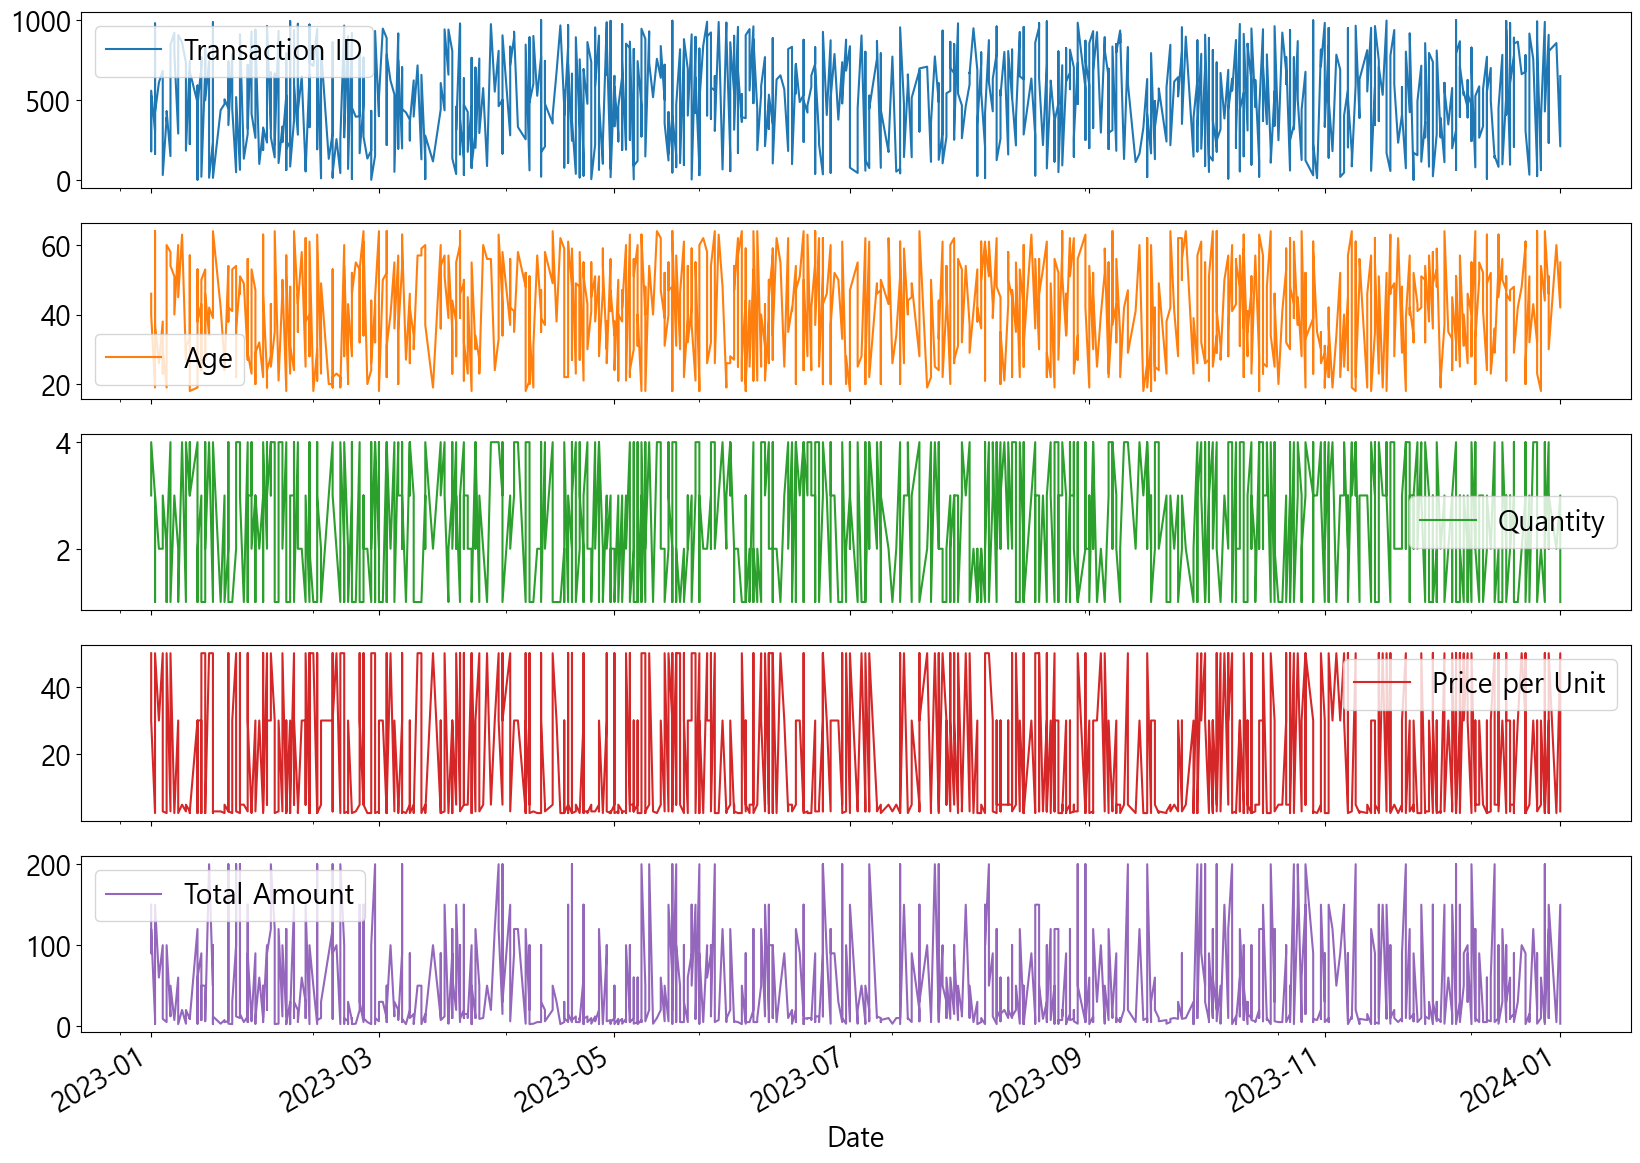

In [9]:
retail[['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']].plot(x='Date', figsize=(20, 15), subplots=True)
plt.savefig('Retail_All.png')

# 다양한 조건에서의 매출 분석 

## 전체 매출


In [10]:
retail_revenue = retail['Total Amount'].sum()
print(retail_revenue,"$",sep='')

45600.0$


## 월별 매출


In [11]:
# 'Date' 열에서 월 정보를 추출하여 새로운 열 'Month' 추가
retail['Month'] = retail['Date'].dt.month

### 월별 배출 계산 및 시각화

In [12]:
# 월별 매출 계산
month_revenue = retail.groupby('Month')['Total Amount'].sum()
month_revenue

Month
1     3698.0
2     4406.0
3     2899.0
4     3387.0
5     5315.0
6     3671.5
7     3546.5
8     3696.0
9     2362.0
10    4658.0
11    3492.0
12    4469.0
Name: Total Amount, dtype: float64

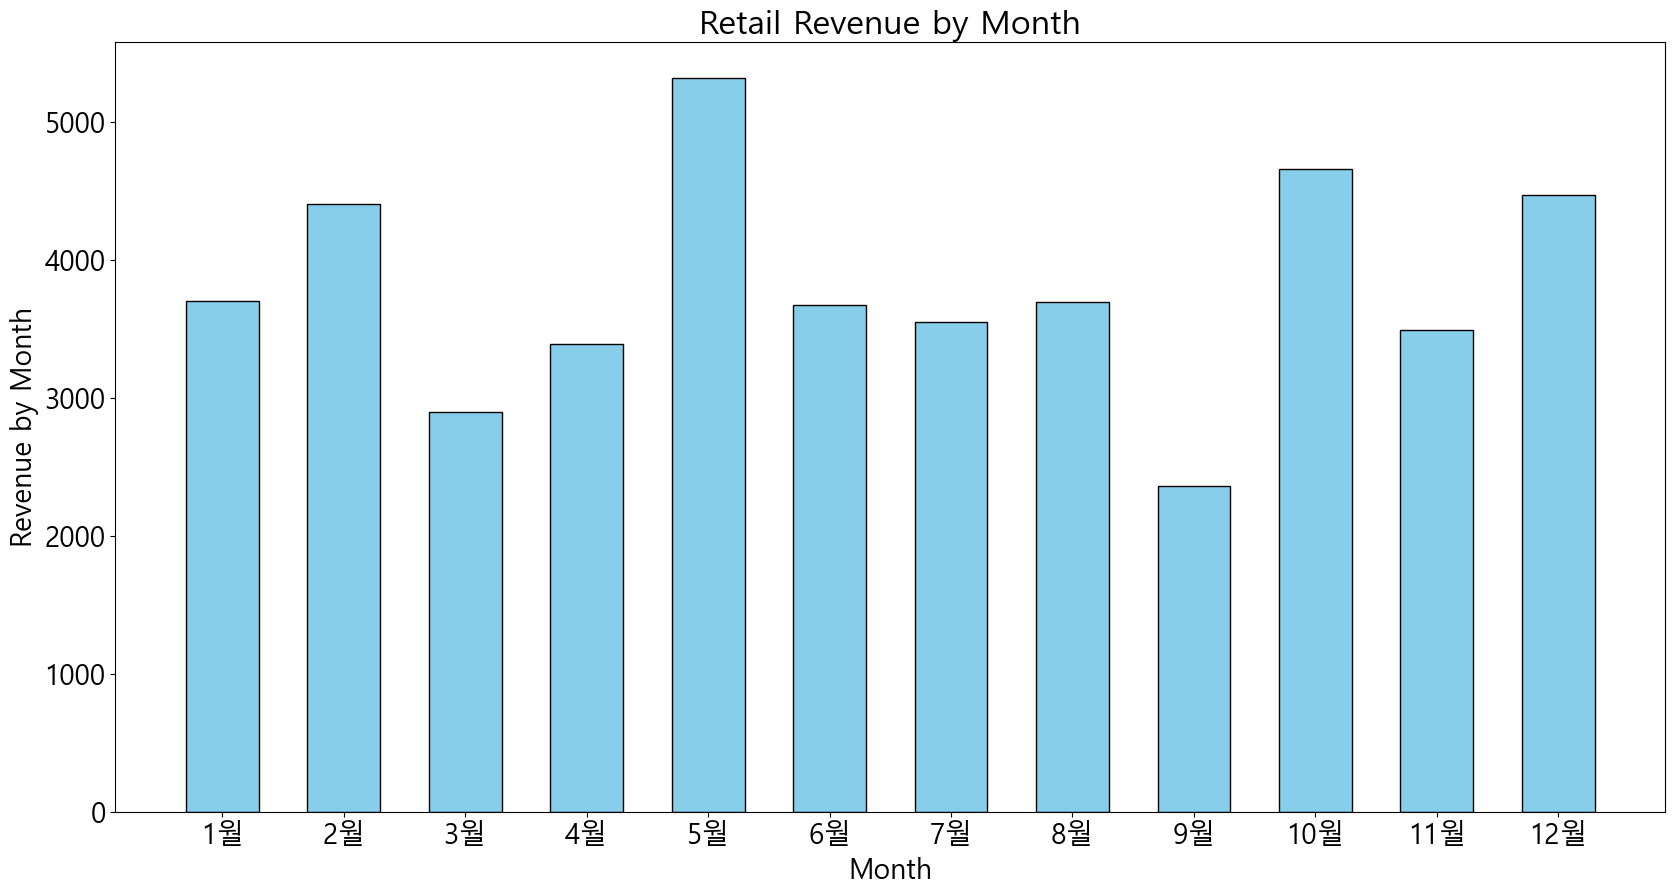

In [13]:
# month열의 인덱스를 문자열로 반환
month_revenue.index = month_revenue.index.astype(str)   

# 막대 그래프 그리기
plt.figure(figsize=(20, 10))
plt.bar(month_revenue.index, month_revenue, width=0.6,color='skyblue', edgecolor='black')

# 그래프에 레이블 추가
plt.xlabel('Month')
plt.ylabel('Revenue by Month')
plt.title('Retail Revenue by Month')

# x축 눈금과 레이블 설정
plt.xticks(range(len(month_revenue)), [f'{month}월' for month in month_revenue.index])

# 그래프 표시

plt.show()

## 요일별 매출


In [14]:
# 'Month' 데이터에서 요일 정보를 추출해서 새로운 열 'Day' 생성
retail['Day'] = retail['Date'].dt.day_name()

In [15]:
# 'retail' 데이터에서 'Date'를 인덱스로 설정하고 날짜별로 그룹화하여 'Total Amount' 합산
day_revenue = retail.set_index('Date').groupby(lambda date : date.dayofweek).sum()['Total Amount']
day_revenue # 0이 월요일

Date
0    7025.0
1    6944.0
2    5877.0
3    5383.5
4    6629.0
5    7881.5
6    5860.0
Name: Total Amount, dtype: float64

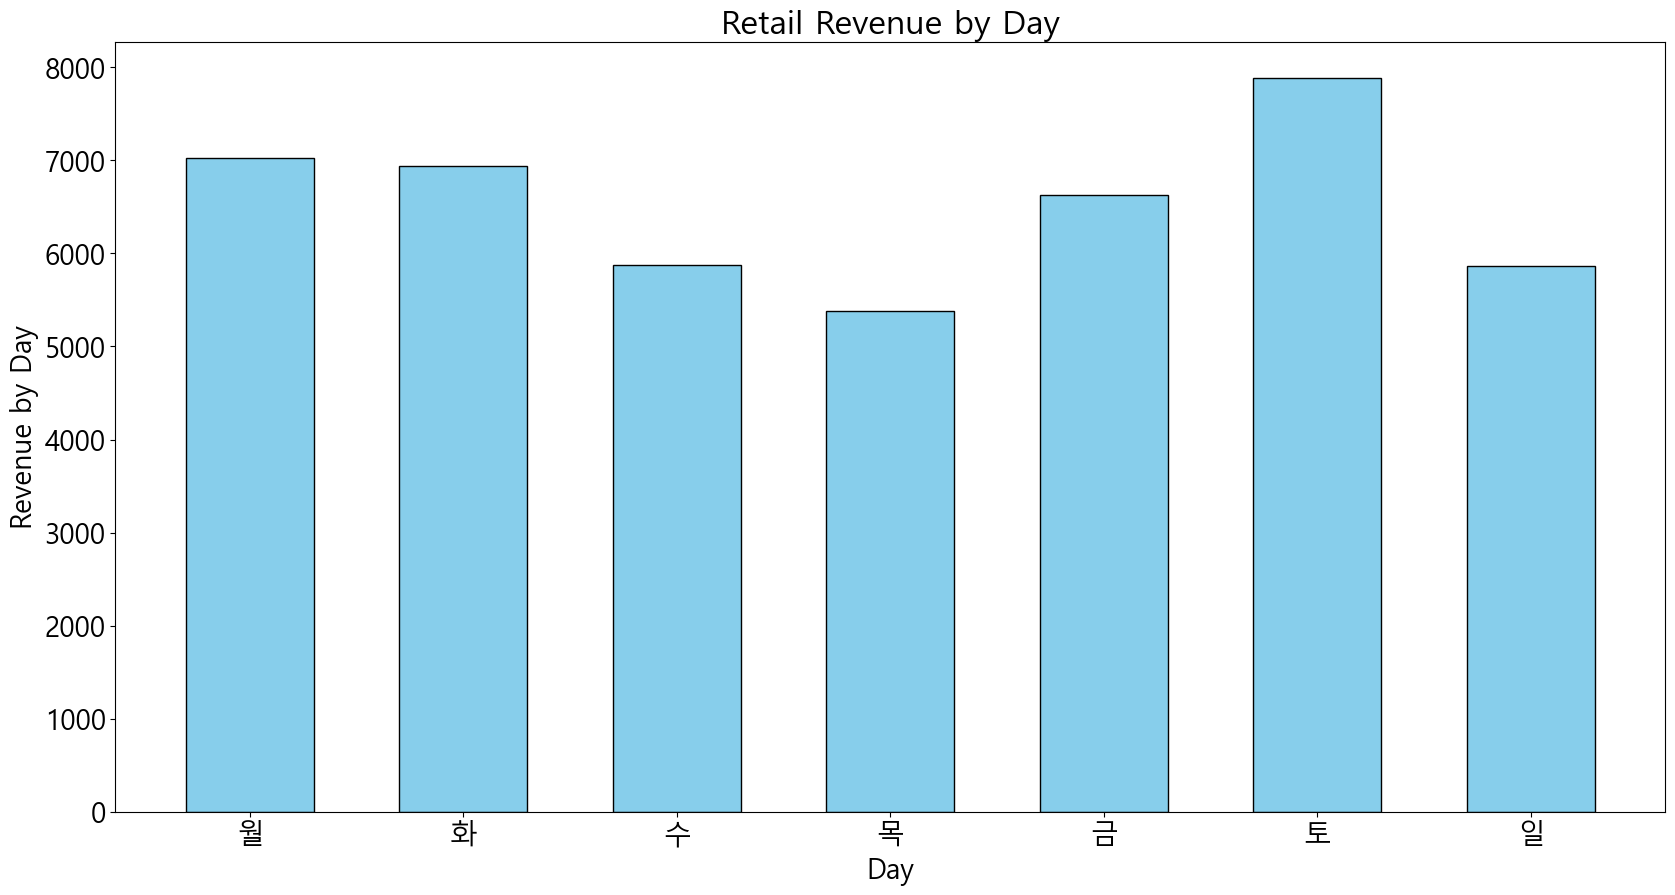

In [16]:
# 막대 그래프 그리기
plt.figure(figsize=(20, 10))
plt.bar(day_revenue.index, day_revenue, width=0.6, color='skyblue', edgecolor='black')

# 그래프에 레이블 추가
plt.xlabel('Day')
plt.ylabel('Revenue by Day')
plt.title('Retail Revenue by Day')

# x축 눈금과 레이블 설정
plt.xticks(range(len(day_revenue)), ['월', '화', '수', '목', '금', '토', '일'])

# 그래프 표시
plt.show()

## 매출 분석을 통해 얻을 수 있는 인사이트와 마케팅 전략
### 1. 가장 많은 매출이 발생한 달은 5월
월별로 매출이 크게 변동하는 것으로 보임. 이는 계절적인 변동이나 다양한 외부 요인에 의해 영향을 받을 수 있습니다. 이러한 변동성을 고려하여 향후 전략을 수립하는 것이 중요합니다.
### 2. 일주일 중 토요일에 가장 많은 판매량 발생
이를 활용하여 토요일에 특별한 프로모션 또는 이벤트를 개최하여 매출을 더욱 증가시킬 수 있습니다.


## 품목별 매출

### 판매 품목 순위

In [17]:
top_selling = retail.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)[:3]
top_selling

Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64

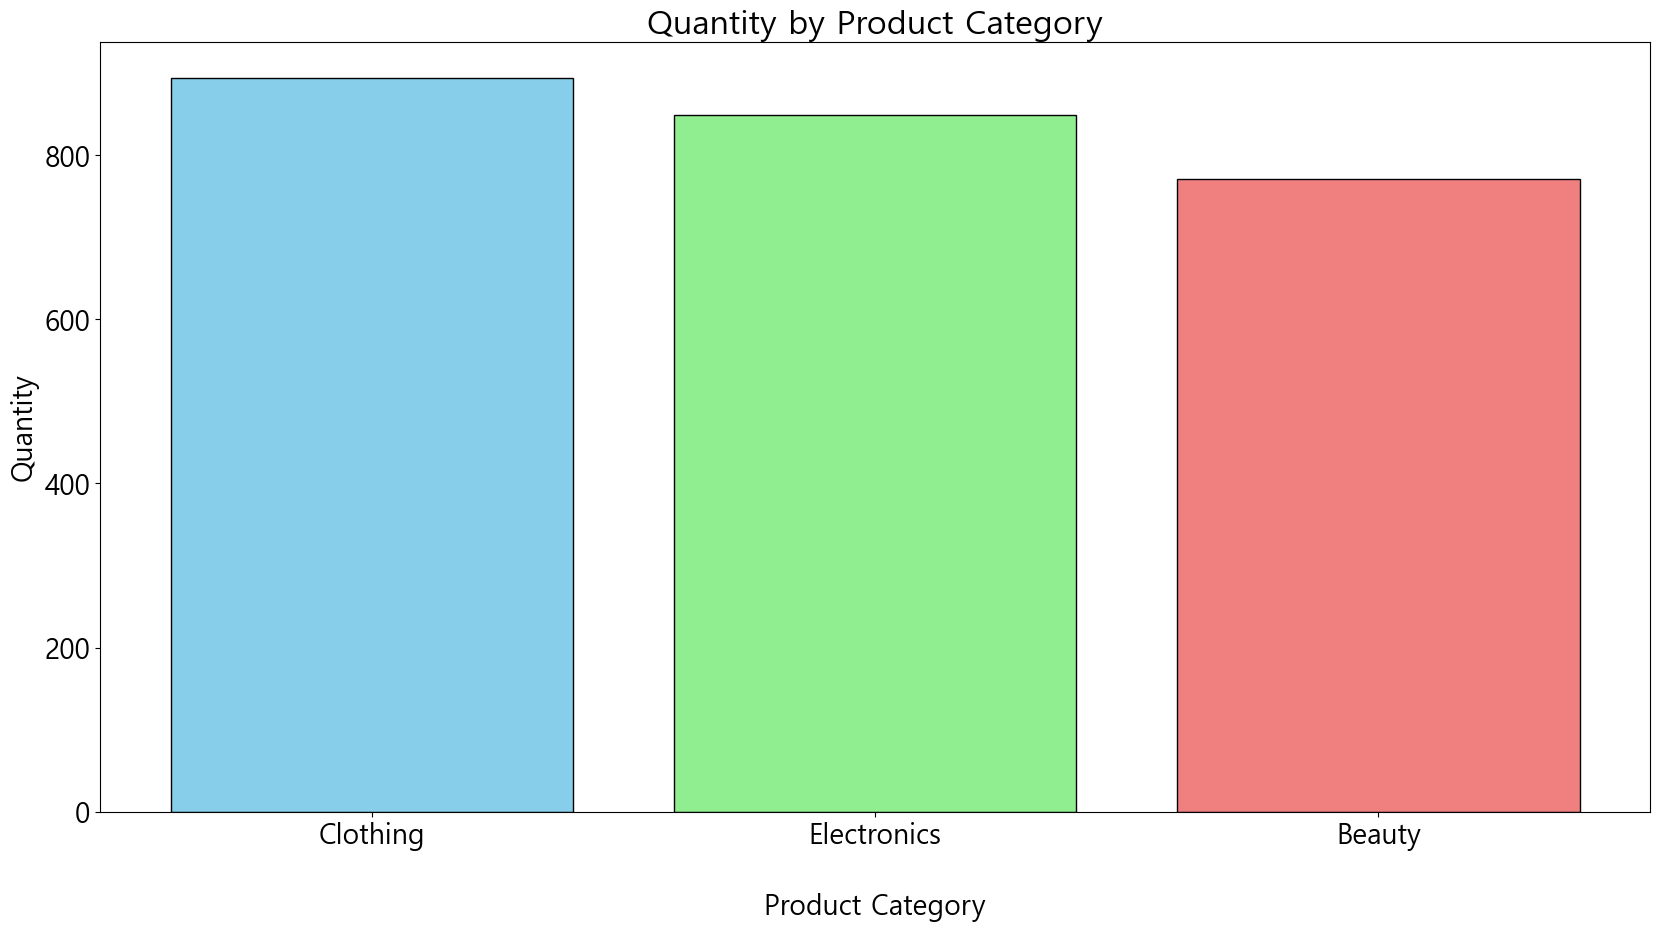

<Figure size 640x480 with 0 Axes>

In [18]:
# 막대 그래프 그리기
plt.figure(figsize=(20, 10))

# 그래프에 레이블 추가
plt.bar(top_selling.index, top_selling, width=0.8, color=['skyblue', 'lightgreen', 'lightcoral'], edgecolor='black')

plt.xlabel('Product Category', labelpad=30)  # labelpad는 xlabel의 위치 조절
plt.ylabel('Quantity')
plt.title('Quantity by Product Category')

# 그래프 표시
plt.show()
plt.savefig('Quantity by Product Category.png')

### 매출 품목 순위

In [19]:
top_revenue = retail.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)[:3]
top_revenue

Product Category
Electronics    15690.5
Clothing       15558.0
Beauty         14351.5
Name: Total Amount, dtype: float64

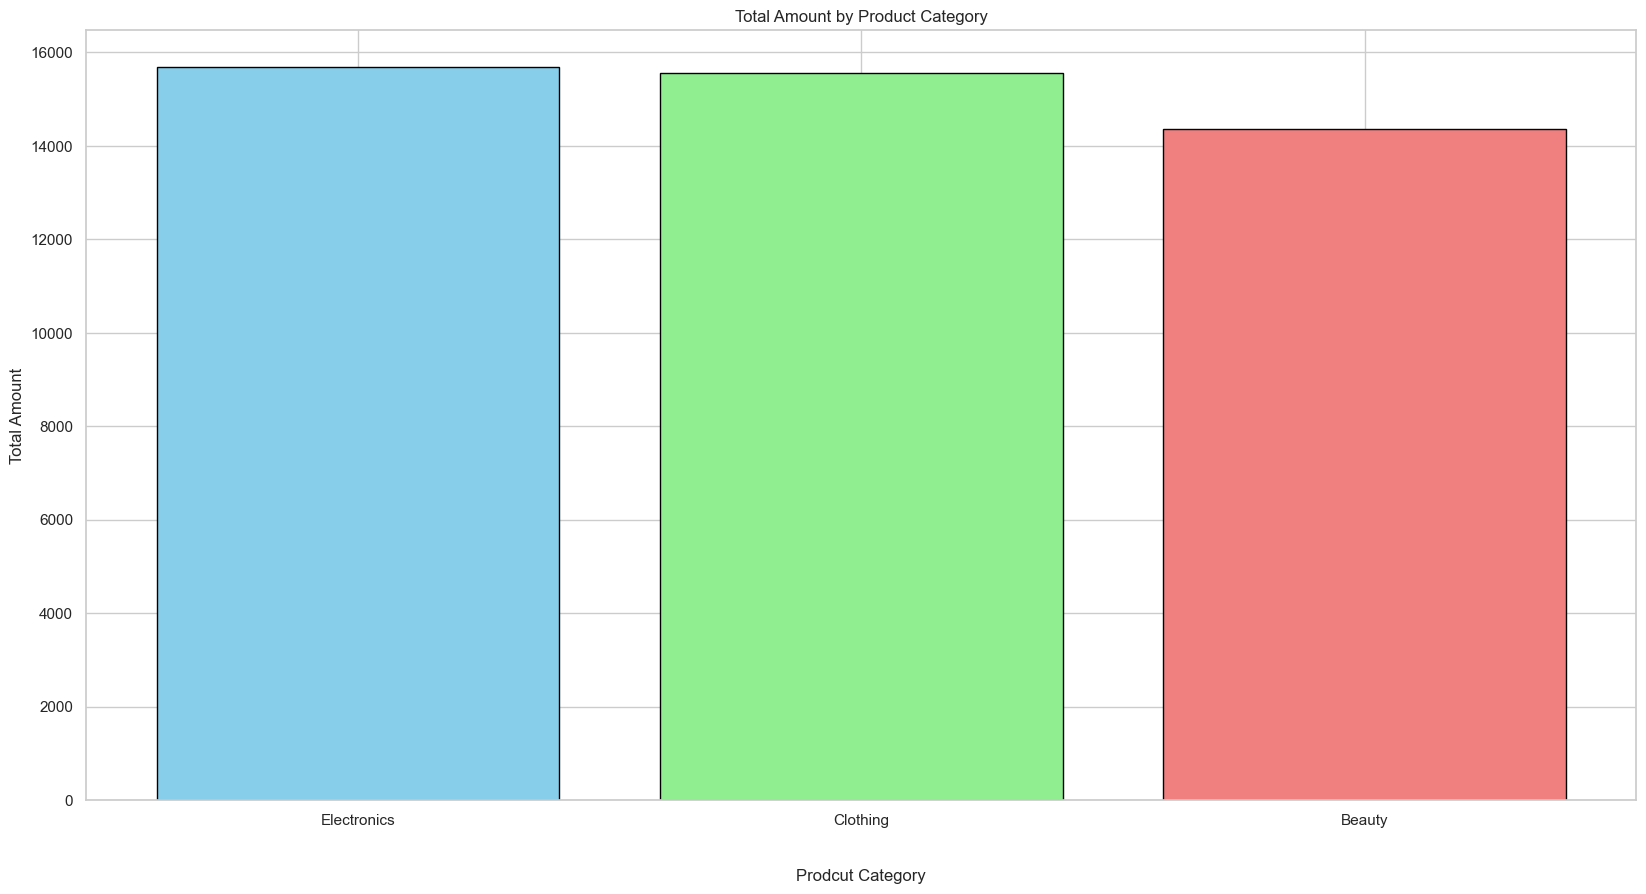

<Figure size 640x480 with 0 Axes>

In [33]:
# 막대 그래프 그리기
plt.figure(figsize=(20, 10))
plt.bar(top_revenue.index, top_revenue, width=0.8,color=['skyblue', 'lightgreen', 'lightcoral'], edgecolor='black')

# 그래프에 레이블 추가
plt.xlabel('Prodcut Category', labelpad = 30)
plt.ylabel('Total Amount')
plt.title('Total Amount by Product Category')


# 그래프 표시
plt.show()
plt.savefig('Total Amount by Product Category.png')

## 품목 분석을 통해 얻을 수 있는 인사이트와 마케팅 전략

###  품목 판매량은 Clothing이 가장 높으나 매출은 Electronics가 가장 높습니다
재고 관리: Clothing의 높은 판매량을 고려하여 재고 관리를 효과적으로 수행하고, Electronics의 경우 수요에 맞게 재고를 유지하는 것이 중요합니다. 이를 통해 재고 부족이나 과잉을 방지하고 수익을 극대화할 수 있습니다.

## 연령대별 상품 구매 분석

In [21]:
# 연령대별 Age Group 생성
age_bins = [0, 18, 25, 35, 50, 100]
age_labels = ['0-19', '20-25', '26-35', '36-50', '51+']
retail['Age Group'] = pd.cut(retail['Age'], bins=age_bins, labels=age_labels)

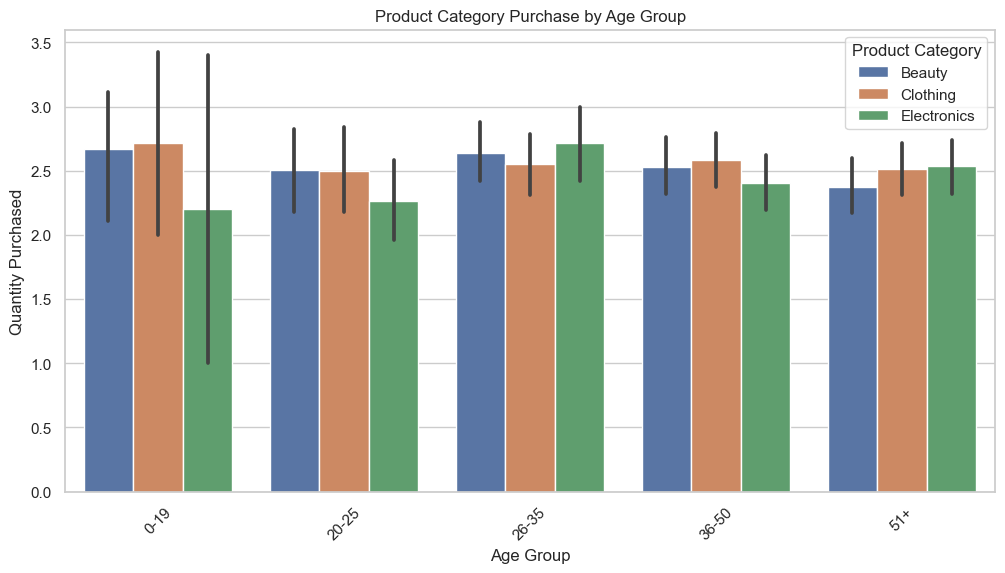

In [39]:
import seaborn as sns
sns.set(font_scale=1.5)   # Seaborn 폰트 사이즈 변경
sns.set(style="whitegrid")   # Seaborn 배경 스타일 설정 

plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='Quantity', hue='Product Category', data=retail) # hue는 그래프에 추가적인 분류 기준 열을 지정

plt.title('Product Category Purchase by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Quantity Purchased')
plt.xticks(rotation=45) 

plt.show()

## 연령대별 상품 구매 분석을 통해 얻을 수 있는 인사이트와 마케팅 전략
### 각 연령대에서 어떤 제품이 가장 많이 팔리는지 파악할 수 있습니다.
크로스 판매 기회 탐색: 특정 연령대에서 특정 상품이 인기일 때, 해당 고객층에게 다른 관련 상품을 소개하여 크로스 판매 기회를 활용할 수 있습니다.


## 상관관계(Correlations)

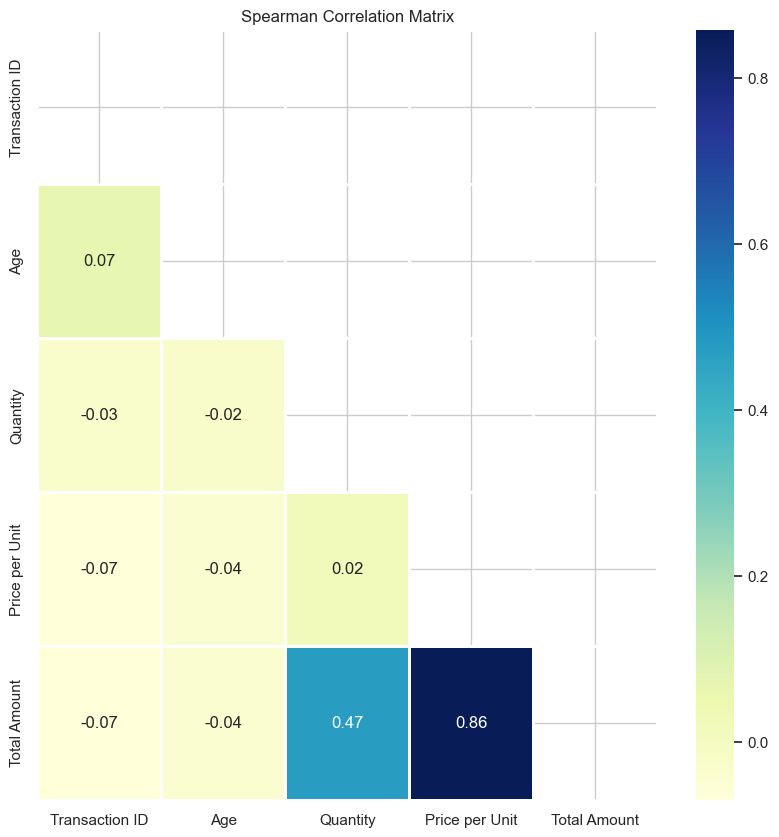

In [46]:
numeric_columns = retail.select_dtypes(include=['int64','float64']).columns   # retail의 정수형, 실수형 숫자 열만 선택
corr = retail[numeric_columns].corr(method='spearman')   # 선택된 숫자 열들의 Spearman 상관관계 행렬 계산

mask = np.triu(np.ones_like(corr, dtype=bool))   # 상관관계 행렬의 상삼각 행렬을 숨기기 위한 마스크를 생성

plt.figure(figsize=(10, 10))

# 상관관계 행렬을 나타내는 히트맵 생성
# annot = True는 각 셀에 숫자 값을 표시하도록 함, cmap은 색상 맵 지정
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")  
cormat.set_title('Spearman Correlation Matrix')
plt.show()


### 히트맵을 통해 숫자형 열들 간의 Spearman 상관관계를 시각적으로 파악할 수 있습니다. 
### 숫자가 높을수록 강한 양의 상관관계를 나타내며, 낮을수록 상관관계가 약하거나 없음을 나타냅니다.